# Análise de Clustering para Dados do Strava

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'strava_data.csv'
strava_data = pd.read_csv(file_path)

running_data = strava_data[strava_data['sport'] == 'Run']

selected_columns = ["duration", "distance", "Max Heart Rate...8", "relative_effort"]
running_data = running_data[selected_columns].rename(columns={
    "Max Heart Rate...8": "max_heart_rate",
    "relative_effort": "effort"
})

running_data = running_data.dropna()
running_data["pace"] = running_data["duration"] / 60 / running_data["distance"]
running_data['speed_m_s'] = (running_data['distance'] * 1000) / running_data["duration"]
running_data = running_data[
    (running_data['duration'] > 0) &
    (running_data['distance'] > 0) &
    (running_data['pace'] > 3) &
    (running_data['pace'] < 10)
]

scaler = StandardScaler()
running_data_scaled = scaler.fit_transform(running_data[['duration', 'distance', 'max_heart_rate', 'effort', 'pace', 'speed_m_s']])

In [18]:
running_data.head(15)

,duration,distance,max_heart_rate,effort,pace,speed_m_s,cluster
0,3880,9.74,181.0,81.0,6.639288,2.510309,0
1,3795,9.86,171.0,32.0,6.414807,2.598155,0
2,4563,11.06,162.0,21.0,6.876130,2.423844,1
3,4161,10.12,165.0,22.0,6.852767,2.432108,1
5,3904,10.04,159.0,18.0,6.480744,2.571721,0
6,2724,7.52,160.0,20.0,6.037234,2.760646,0
8,3885,9.84,168.0,41.0,6.580285,2.532819,0
9,3954,9.93,166.0,19.0,6.636455,2.511381,0
10,4195,10.35,165.0,23.0,6.755233,2.467223,1
11,4085,9.96,158.0,21.0,6.835676,2.438188,1


In [19]:
running_data.describe()

,duration,distance,max_heart_rate,effort,pace,speed_m_s,cluster
count,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000
mean,4000.601673,9.939985,167.814842,55.593307,6.710371,2.495758,0.973809
std,444.327457,0.953886,24.144871,66.049746,0.468094,0.174570,1.144907
min,285.000000,0.780000,54.000000,0.000000,4.205231,1.668857,0.000000
25%,3824.000000,9.790000,156.000000,17.000000,6.389436,2.377457,0.000000
50%,4029.000000,9.930000,166.000000,23.000000,6.695238,2.489331,1.000000
75%,4215.000000,10.150000,179.000000,65.000000,7.010292,2.608472,1.000000
max,6809.000000,21.180000,254.000000,449.000000,9.986877,3.963317,3.000000


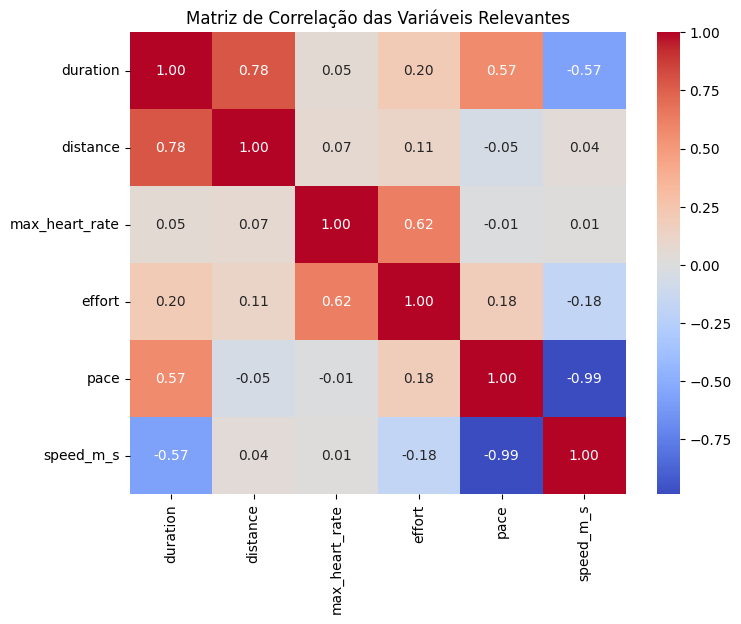

In [4]:
correlation_matrix = running_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação das Variáveis Relevantes")
plt.show()

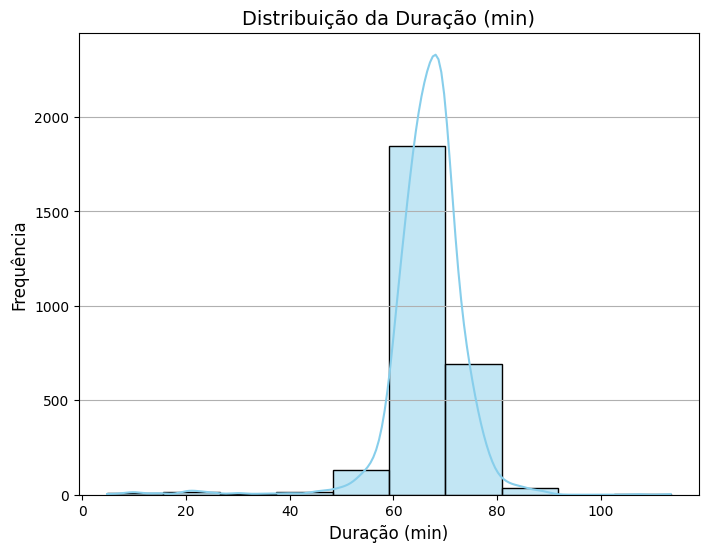

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(
    running_data['duration'] / 60, bins=10, kde=True, color='skyblue'
)
plt.title('Distribuição da Duração (min)', fontsize=14)
plt.xlabel('Duração (min)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y')
plt.show()

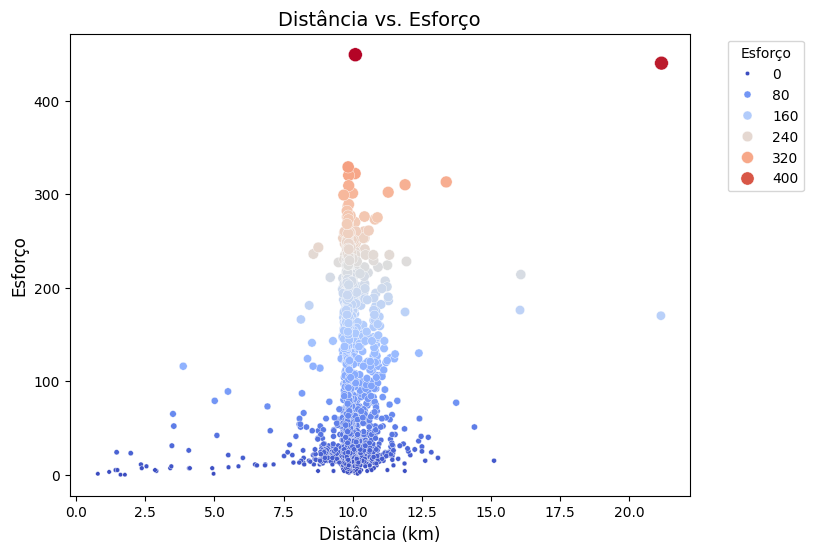

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=running_data,
    x='distance',
    y='effort',
    hue='effort',
    palette='coolwarm',
    size='effort',
    sizes=(10, 100),
)
plt.title('Distância vs. Esforço', fontsize=14)
plt.xlabel('Distância (km)', fontsize=12)
plt.ylabel('Esforço', fontsize=12)
plt.legend(title='Esforço', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

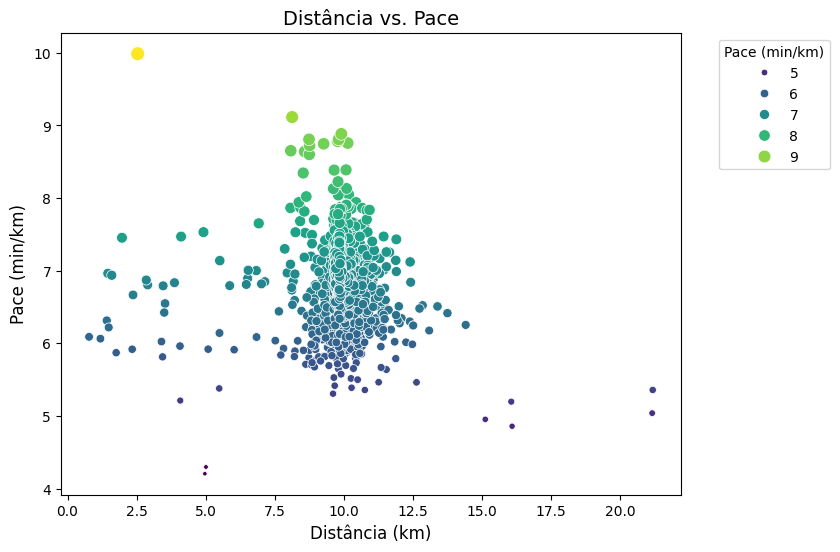

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=running_data,
    x='distance',
    y='pace',
    hue='pace',
    palette='viridis',
    size='pace',
    sizes=(10, 100),
)
plt.title('Distância vs. Pace', fontsize=14)
plt.xlabel('Distância (km)', fontsize=12)
plt.ylabel('Pace (min/km)', fontsize=12)
plt.legend(title='Pace (min/km)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

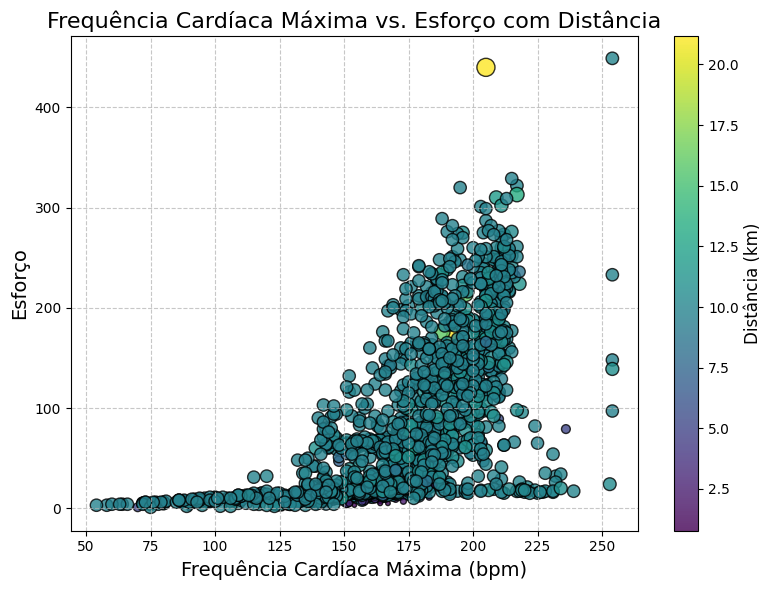

In [16]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    running_data['max_heart_rate'],
    running_data['effort'],
    c=running_data['distance'],
    s=running_data['distance'] * 8,
    cmap='viridis',
    alpha=0.8,
    edgecolor='k'
)

# Configuração do gráfico
plt.title('Frequência Cardíaca Máxima vs. Esforço com Distância', fontsize=16)
plt.xlabel('Frequência Cardíaca Máxima (bpm)', fontsize=14)
plt.ylabel('Esforço', fontsize=14)

# Adicionando uma barra de cores para representar a distância
cbar = plt.colorbar(scatter)
cbar.set_label('Distância (km)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

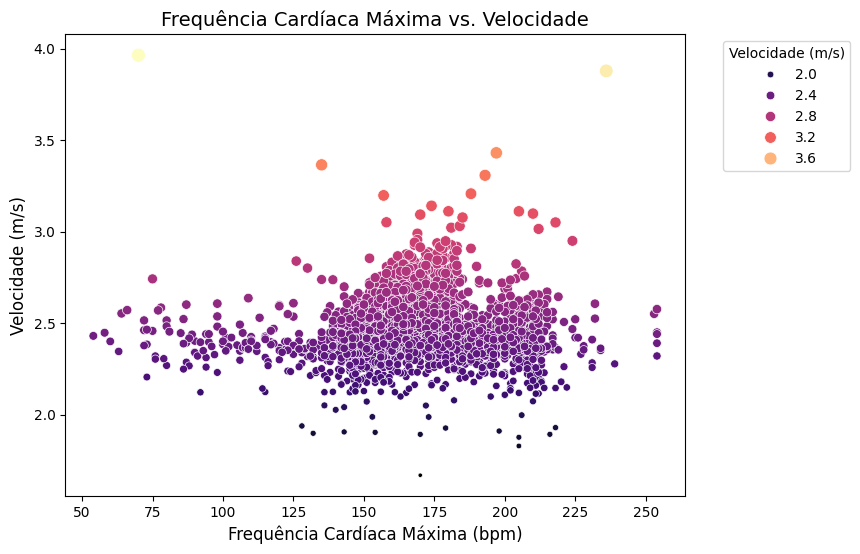

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=running_data,
    x='max_heart_rate',
    y='speed_m_s',
    hue='speed_m_s',
    palette='magma',
    size='speed_m_s',
    sizes=(10, 100),
)
plt.title('Frequência Cardíaca Máxima vs. Velocidade', fontsize=14)
plt.xlabel('Frequência Cardíaca Máxima (bpm)', fontsize=12)
plt.ylabel('Velocidade (m/s)', fontsize=12)
plt.legend(title='Velocidade (m/s)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Método Elbow para Determinar o Número Ideal de Clusters

C:\Users\caiob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\caiob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


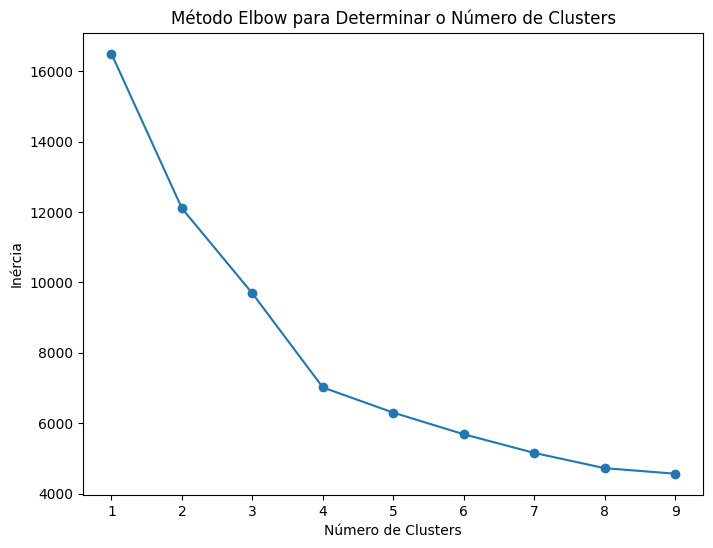

In [10]:
# Determinar o número de clusters (Elbow Method)
inertia = []
range_clusters = range(1, 10)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(running_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o método Elbow
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.show()
    

## Aplicar o K-Means e Analisar os Resultados

In [11]:
# Aplicar o K-Means com 4 clusters
optimal_clusters = 4
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
running_data['cluster'] = kmeans_final.fit_predict(running_data_scaled)

# Salvar os resultados
running_data.to_csv('running_clusters.csv', index=False)
running_data['cluster'].value_counts()
    

cluster
0    1261
1     876
3     577
2      35
Name: count, dtype: int64

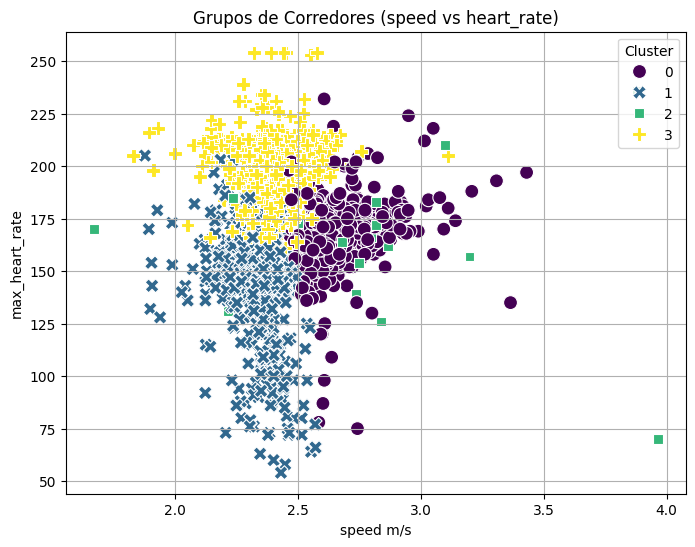

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de dispersão com Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=running_data, 
    x='speed_m_s', 
    y='max_heart_rate', 
    hue='cluster', 
    palette='viridis', 
    style='cluster',
    s=100
)
plt.title('Grupos de Corredores (speed vs heart_rate)')
plt.xlabel('speed m/s')
plt.ylabel('max_heart_rate')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


## Exemplificando o codigo na pratica


In [13]:
def assign_cluster(new_data):
    # Converter os dados do novo corredor para DataFrame
    new_data_df = pd.DataFrame([new_data], columns=['duration', 'distance', 'max_heart_rate', 'effort', 'pace', 'speed_m_s'])
    # Normalizar os dados do novo corredor
    new_data_scaled = scaler.transform(new_data_df)
    # Prever o cluster
    cluster_pred = kmeans_final.predict(new_data_scaled)
    return cluster_pred[0]

In [14]:
def generate_customized_training(cluster):
    # Definir os treinos com base no cluster
    training_plans = {
        0: "Treino leve: Corrida de 30-40 min a um pace moderado (5:30 min/km).",
        1: "Treino intermediário: Corrida de 40-60 min com intervalos (8 min/km por 5 minutos e 4:30 min/km por 3 minutos).",
        2: "Treino avançado: Corrida de 60-90 min com intervalos de alta intensidade (4:00 min/km por 10 minutos, 2:00 min/km por 5 minutos).",
        3: "Treino competitivo: Corrida de 90 minutos a 2 horas com pace variado (3:50 min/km nos 10 primeiros minutos, seguido de recuperação)."
    }
    
    # Retornar o plano de treino
    return training_plans.get(cluster, "Treino personalizado não disponível")

In [15]:
# Exemplo: Atribuindo um novo corredor a um cluster
new_runner_data = [4000, 10.0, 160, 50]  # [duration in seconds, distance in km, max_heart_rate, effort] do novo corredor

pace = new_runner_data[0] / 60 / new_runner_data[1]
speed_m_s = (new_runner_data[1] * 1000)/ new_runner_data[0]
new_runner_data.append(pace)
new_runner_data.append(speed_m_s)


new_cluster = assign_cluster(new_runner_data)

# Gerar o treino personalizado
personalized_training = generate_customized_training(new_cluster)
print(f"Cluster do corredor novo: {new_cluster}")
print(f"Treino personalizado: {personalized_training}")

Cluster do corredor novo: 0
Treino personalizado: Treino leve: Corrida de 30-40 min a um pace moderado (5:30 min/km).
